In [22]:
# Some useful packages
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf
import keras

In [3]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [4]:
# Random Forest
# ARIMA
# LSTM

In [12]:
df = pd.read_csv('full.csv')

In [13]:
df.head()

,Unnamed: 0,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,0,2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,1,2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2,2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,3,2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,4,2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 13 columns):
Unnamed: 0         5137 non-null int64
Datetime           5137 non-null object
Weekday            5137 non-null object
Part of the day    5137 non-null object
counts             5137 non-null int64
Temperature        5132 non-null object
Dew Point          5132 non-null object
Humidity           5132 non-null object
Wind               5132 non-null object
Wind Speed         5132 non-null object
Wind Gust          5132 non-null object
Pressure           5132 non-null object
State Holiday      5132 non-null float64
dtypes: float64(1), int64(2), object(10)
memory usage: 521.8+ KB


In [16]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
df.head()

,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [25]:
#df[0:4110].to_csv('train.csv')

In [28]:
#df[4110:5137].to_csv('test.csv')

# Splitting into train and Test

In [ ]:
#5137 -> 
# 80% = 4110 samples
# 20% = 1027 samples

In [42]:
train = pd.read_csv('train.csv')

In [31]:
test = pd.read_csv('test.csv')

In [43]:
train.head()

,Unnamed: 0,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,0,2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,1,2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2,2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,3,2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,4,2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 13 columns):
Unnamed: 0         4110 non-null int64
Datetime           4110 non-null object
Weekday            4110 non-null object
Part of the day    4110 non-null object
counts             4110 non-null int64
Temperature        4108 non-null object
Dew Point          4108 non-null object
Humidity           4108 non-null object
Wind               4108 non-null object
Wind Speed         4108 non-null object
Wind Gust          4108 non-null object
Pressure           4108 non-null object
State Holiday      4108 non-null float64
dtypes: float64(1), int64(2), object(10)
memory usage: 417.5+ KB


In [53]:
#train.drop(columns=['Unnamed: 0'],inplace=True)
test.drop(columns=['Unnamed: 0'],inplace=True)

In [45]:
test.head()

,Unnamed: 0,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,4110,2017-10-20 00:00:00,Friday,Night,4,63 F,61 F,94 %,ENE,7 mph,0 mph,29.8 in,0.0
1,4111,2017-10-20 02:00:00,Friday,Night,1,63 F,61 F,94 %,N,10 mph,0 mph,29.9 in,0.0
2,4112,2017-10-20 04:00:00,Friday,Night,1,63 F,61 F,94 %,NNE,7 mph,0 mph,29.9 in,0.0
3,4113,2017-10-20 06:00:00,Friday,Morning,2,61 F,59 F,94 %,N,3 mph,0 mph,29.9 in,0.0
4,4114,2017-10-20 07:00:00,Friday,Morning,4,61 F,61 F,100 %,NNW,5 mph,0 mph,29.9 in,0.0


In [46]:
train.head()

,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
1,2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2,2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
3,2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
4,2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [49]:
train.set_index('Datetime', inplace=True)

In [50]:
train.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [54]:
test.head()

,Datetime,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
0,2017-10-20 00:00:00,Friday,Night,4,63 F,61 F,94 %,ENE,7 mph,0 mph,29.8 in,0.0
1,2017-10-20 02:00:00,Friday,Night,1,63 F,61 F,94 %,N,10 mph,0 mph,29.9 in,0.0
2,2017-10-20 04:00:00,Friday,Night,1,63 F,61 F,94 %,NNE,7 mph,0 mph,29.9 in,0.0
3,2017-10-20 06:00:00,Friday,Morning,2,61 F,59 F,94 %,N,3 mph,0 mph,29.9 in,0.0
4,2017-10-20 07:00:00,Friday,Morning,4,61 F,61 F,100 %,NNW,5 mph,0 mph,29.9 in,0.0


In [55]:
test.set_index('Datetime', inplace=True)

In [102]:
test.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-10-20 00:00:00,Friday,Night,4,63,61,94,ENE,7,0,29.8,0.0
2017-10-20 02:00:00,Friday,Night,1,63,61,94,N,10,0,29.9,0.0
2017-10-20 04:00:00,Friday,Night,1,63,61,94,NNE,7,0,29.9,0.0
2017-10-20 06:00:00,Friday,Morning,2,61,59,94,N,3,0,29.9,0.0
2017-10-20 07:00:00,Friday,Morning,4,61,61,100,NNW,5,0,29.9,0.0


In [95]:
train['Dew Point'] = train['Dew Point'].str.replace('F', '')
test['Dew Point'] = test['Dew Point'].str.replace('F', '')
train['Temperature'] = train['Temperature'].str.replace('F', '')
test['Temperature'] = test['Temperature'].str.replace('F', '')
train['Humidity'] = train['Humidity'].str.replace('%', '')
test['Humidity'] = test['Humidity'].str.replace('%', '')
train['Wind Speed'] = train['Wind Speed'].str.replace('mph', '')
test['Wind Speed'] = test['Wind Speed'].str.replace('mph', '')
train['Pressure'] = train['Pressure'].str.replace('in', '')
test['Pressure'] = test['Pressure'].str.replace('in', '')


In [98]:
train['Wind Gust'] = train['Wind Gust'].str.replace('mph', '')
test['Wind Gust'] = test['Wind Gust'].str.replace('mph', '')

In [104]:
cols = ['Temperature', 'Dew Point', 'Humidity','Wind Speed','Wind Gust','Pressure']
train[cols] = train[cols].apply(pd.to_numeric)
test[cols] = test[cols].apply(pd.to_numeric)


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1027 entries, 2017-10-20 00:00:00 to 2017-12-31 23:00:00
Data columns (total 11 columns):
Weekday            1027 non-null object
Part of the day    1027 non-null object
counts             1027 non-null int64
Temperature        1024 non-null float64
Dew Point          1024 non-null float64
Humidity           1024 non-null float64
Wind               1024 non-null object
Wind Speed         1024 non-null float64
Wind Gust          1024 non-null float64
Pressure           1024 non-null float64
State Holiday      1024 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 96.3+ KB


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4110 entries, 2017-01-01 02:00:00 to 2017-10-19 22:00:00
Data columns (total 11 columns):
Weekday            4110 non-null object
Part of the day    4110 non-null object
counts             4110 non-null int64
Temperature        4108 non-null float64
Dew Point          4108 non-null float64
Humidity           4108 non-null float64
Wind               4108 non-null object
Wind Speed         4108 non-null float64
Wind Gust          4108 non-null float64
Pressure           4108 non-null float64
State Holiday      4108 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 385.3+ KB


In [107]:
test.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-10-20 00:00:00,Friday,Night,4,63.0,61.0,94.0,ENE,7.0,0.0,29.8,0.0
2017-10-20 02:00:00,Friday,Night,1,63.0,61.0,94.0,N,10.0,0.0,29.9,0.0
2017-10-20 04:00:00,Friday,Night,1,63.0,61.0,94.0,NNE,7.0,0.0,29.9,0.0
2017-10-20 06:00:00,Friday,Morning,2,61.0,59.0,94.0,N,3.0,0.0,29.9,0.0
2017-10-20 07:00:00,Friday,Morning,4,61.0,61.0,100.0,NNW,5.0,0.0,29.9,0.0


In [108]:
train.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-01-01 02:00:00,Sunday,Night,1,43.0,37.0,81.0,NW,9.0,0.0,30.3,1.0
2017-01-01 04:00:00,Sunday,Night,1,41.0,36.0,81.0,NW,9.0,0.0,30.3,1.0
2017-01-01 06:00:00,Sunday,Morning,1,41.0,36.0,81.0,NW,12.0,0.0,30.3,1.0
2017-01-01 07:00:00,Sunday,Morning,2,41.0,36.0,81.0,NW,14.0,0.0,30.3,1.0
2017-01-01 10:00:00,Sunday,Morning,2,39.0,34.0,81.0,NW,13.0,0.0,30.3,1.0


In [100]:
test.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-10-20 00:00:00,Friday,Night,4,63,61,94,ENE,7,0,29.8,0.0
2017-10-20 02:00:00,Friday,Night,1,63,61,94,N,10,0,29.9,0.0
2017-10-20 04:00:00,Friday,Night,1,63,61,94,NNE,7,0,29.9,0.0
2017-10-20 06:00:00,Friday,Morning,2,61,59,94,N,3,0,29.9,0.0
2017-10-20 07:00:00,Friday,Morning,4,61,61,100,NNW,5,0,29.9,0.0


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4110 entries, 2017-01-01 02:00:00 to 2017-10-19 22:00:00
Data columns (total 11 columns):
Weekday            4110 non-null object
Part of the day    4110 non-null object
counts             4110 non-null int64
Temperature        4108 non-null object
Dew Point          4108 non-null object
Humidity           4108 non-null object
Wind               4108 non-null object
Wind Speed         4108 non-null object
Wind Gust          4108 non-null object
Pressure           4108 non-null object
State Holiday      4108 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 385.3+ KB


In [109]:
train_X = train[['Weekday','Part of the day', 
                 'Temperature', 'Humidity',
                 'Wind Speed', 'Wind Gust', 'State Holiday']]
#input dim = 7 

train_y = train['counts']

In [126]:
#use temporarily because of issue with reshaping
train_X = train[[ 'Temperature', 'Humidity',
                 'Wind Speed', 'Wind Gust', 'State Holiday']]
#input dim = 5

train_y = train['counts']

test_X = test[[
                 'Temperature', 'Humidity',
                 'Wind Speed', 'Wind Gust', 'State Holiday']]
test_Y = test['counts']

In [132]:
train_X.head()

,Temperature,Humidity,Wind Speed,Wind Gust,State Holiday
Datetime,,,,,
2017-01-01 02:00:00,43.0,81.0,9.0,0.0,1.0
2017-01-01 04:00:00,41.0,81.0,9.0,0.0,1.0
2017-01-01 06:00:00,41.0,81.0,12.0,0.0,1.0
2017-01-01 07:00:00,41.0,81.0,14.0,0.0,1.0
2017-01-01 10:00:00,39.0,81.0,13.0,0.0,1.0


In [75]:
print(train_X.shape)

(4110, 7)


In [76]:
print(train_y.shape)

(4110,)


In [77]:
train_y.head()

Datetime
2017-01-01 02:00:00    1
2017-01-01 04:00:00    1
2017-01-01 06:00:00    1
2017-01-01 07:00:00    2
2017-01-01 10:00:00    2
Name: counts, dtype: int64

In [110]:
test_X = test[['Weekday','Part of the day', 
                 'Temperature', 'Humidity',
                 'Wind Speed', 'Wind Gust', 'State Holiday']]
test_Y = test['counts']

# Random Forest

# LSTM

In [ ]:

#Rakshit's model
    
inp = kl.Input((None,))
x = kl.LSTM(128, return_sequences=True)(x)
x = kl.GlobalMaxPool1D()(x)
x = kl.Dense(64, activation='sigmoid')(x)
out = kl.Dense(n_classes, activation='sigmoid')(x)

model = keras.Model(inputs=inp, outputs=out)
model.summary()


In [115]:
# Resizing
#X, y = np.array(train_X), np.array(train_y)
X = train_X.to_numpy()
print(X.shape)
#X = X.reshape(X.shape[0],50, 7)
#X = X.reshape(X.shape[0], 50, 7)
#print(X.shape)
#print(X_test.shape)

(4110, 7)


In [119]:
print(X[0])

['Sunday' 'Night' 43.0 81.0 9.0 0.0 1.0]


In [121]:
# reshape input to be 3D [samples, timesteps, features]
temp_x = X.reshape((4110, 50, 5))
print(train_X.shape)

ValueError: cannot reshape array of size 28770 into shape (4110,50,5)

In [87]:
# https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/
samples = list()
length = 137
n = 4110
for i in range(0,n,length):
    sample= train[i:i+length]
    samples.append(sample)
#data = array(data)
#print(data[:5, :])
print(len(samples))

30


In [91]:
d = np.matrix(samples)
print(d.shape)

ValueError: cannot copy sequence with size 137 to array axis with dimension 11

In [130]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In [136]:
full = pd.read_csv('full.csv')

In [139]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 13 columns):
Unnamed: 0         5137 non-null int64
Datetime           5137 non-null object
Weekday            5137 non-null object
Part of the day    5137 non-null object
counts             5137 non-null int64
Temperature        5132 non-null object
Dew Point          5132 non-null object
Humidity           5132 non-null object
Wind               5132 non-null object
Wind Speed         5132 non-null object
Wind Gust          5132 non-null object
Pressure           5132 non-null object
State Holiday      5132 non-null float64
dtypes: float64(1), int64(2), object(10)
memory usage: 521.8+ KB


In [141]:
full.drop(columns=['Unnamed: 0'],inplace=True)

In [146]:
full.set_index('Datetime',inplace=True)

In [147]:
full.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-01-01 02:00:00,Sunday,Night,1,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2017-01-01 04:00:00,Sunday,Night,1,41 F,36 F,81 %,NW,9 mph,0 mph,30.3 in,1.0
2017-01-01 06:00:00,Sunday,Morning,1,41 F,36 F,81 %,NW,12 mph,0 mph,30.3 in,1.0
2017-01-01 07:00:00,Sunday,Morning,2,41 F,36 F,81 %,NW,14 mph,0 mph,30.3 in,1.0
2017-01-01 10:00:00,Sunday,Morning,2,39 F,34 F,81 %,NW,13 mph,0 mph,30.3 in,1.0


In [148]:
full['Dew Point'] = full['Dew Point'].str.replace('F', '')
full['Temperature'] = full['Temperature'].str.replace('F', '')
full['Humidity'] = full['Humidity'].str.replace('%', '')
full['Wind Speed'] = full['Wind Speed'].str.replace('mph', '')
full['Pressure'] = full['Pressure'].str.replace('in', '')
full['Wind Gust'] = full['Wind Gust'].str.replace('mph', '')


In [505]:
full.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-01-01 02:00:00,Sunday,Night,1,43,37,81,NW,9,0,30.3,1.0
2017-01-01 04:00:00,Sunday,Night,1,41,36,81,NW,9,0,30.3,1.0
2017-01-01 06:00:00,Sunday,Morning,1,41,36,81,NW,12,0,30.3,1.0
2017-01-01 07:00:00,Sunday,Morning,2,41,36,81,NW,14,0,30.3,1.0
2017-01-01 10:00:00,Sunday,Morning,2,39,34,81,NW,13,0,30.3,1.0


In [515]:
#use temporarily because of issue with reshaping
df = full[['Temperature', 'Humidity','Wind Speed', 'Wind Gust', 'State Holiday','counts']]
#input dim = 5

#train_y = train['counts']

#test_X = full[[
 #                'Temperature', 'Humidity',
  #               'Wind Speed', 'Wind Gust', 'State Holiday','counts']]
#test_Y = test['counts']

In [516]:
values = df.values
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled,1,1)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.216667       0.81   0.250000        0.0        1.0      0.000  0.183333   
2   0.183333       0.81   0.250000        0.0        1.0      0.000  0.183333   
3   0.183333       0.81   0.333333        0.0        1.0      0.000  0.183333   
4   0.183333       0.81   0.388889        0.0        1.0      0.125  0.150000   
5   0.150000       0.81   0.361111        0.0        1.0      0.125  0.216667   

   var2(t)   var3(t)  var4(t)  var5(t)  var6(t)  
1     0.81  0.250000      0.0      1.0    0.000  
2     0.81  0.333333      0.0      1.0    0.000  
3     0.81  0.388889      0.0      1.0    0.125  
4     0.81  0.361111      0.0      1.0    0.125  
5     0.70  0.416667      0.0      1.0    0.000  


In [517]:
values = reframed.values
n_train_hours = 82*50
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

#split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshape to 3d
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X =test_X.reshape((test_X.shape[0],1,test_X.shape[1]))
print(train_X.shape,train_y.shape, test_X.shape, test_y.shape)

(4100, 1, 11) (4100,) (1026, 1, 11) (1026,)


In [518]:
print("X_train size", train_X.shape)
print("y_train size", train_y.shape)

print("X_test size", test_X.shape)
print("y_test size", test_y.shape)


X_train size (4100, 1, 11)
y_train size (4100,)
X_test size (1026, 1, 11)
y_test size (1026,)


Epoch 1/100
 - 6s - loss: 0.0243 - acc: 0.4583
Epoch 2/100
 - 0s - loss: 0.0235 - acc: 0.4583
Epoch 3/100
 - 0s - loss: 0.0234 - acc: 0.4583
Epoch 4/100
 - 0s - loss: 0.0233 - acc: 0.4583
Epoch 5/100
 - 0s - loss: 0.0233 - acc: 0.4583
Epoch 6/100
 - 0s - loss: 0.0232 - acc: 0.4583
Epoch 7/100
 - 0s - loss: 0.0232 - acc: 0.4583
Epoch 8/100
 - 0s - loss: 0.0232 - acc: 0.4583
Epoch 9/100
 - 0s - loss: 0.0232 - acc: 0.4583
Epoch 10/100
 - 0s - loss: 0.0232 - acc: 0.4583
Epoch 11/100
 - 0s - loss: 0.0232 - acc: 0.4583
Epoch 12/100
 - 0s - loss: 0.0231 - acc: 0.4583
Epoch 13/100
 - 0s - loss: 0.0231 - acc: 0.4583
Epoch 14/100
 - 0s - loss: 0.0231 - acc: 0.4583
Epoch 15/100
 - 0s - loss: 0.0231 - acc: 0.4583
Epoch 16/100
 - 0s - loss: 0.0231 - acc: 0.4583
Epoch 17/100
 - 0s - loss: 0.0231 - acc: 0.4583
Epoch 18/100
 - 0s - loss: 0.0230 - acc: 0.4583
Epoch 19/100
 - 0s - loss: 0.0230 - acc: 0.4583
Epoch 20/100
 - 0s - loss: 0.0230 - acc: 0.4583
Epoch 21/100
 - 0s - loss: 0.0230 - acc: 0.4583
E

KeyError: 'val_loss'

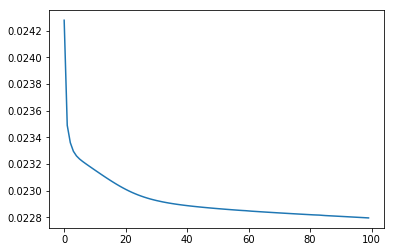

In [519]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# fit network
#history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
history = model.fit(train_X, train_y, epochs=100, batch_size=72, verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#accuracy


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [500]:
yhat = model.predict(test_X)
 
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
#print(test_X.shape)



In [459]:
# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]



ValueError: operands could not be broadcast together with shapes (1026,11) (6,) (1026,11) 

In [501]:
print(inv_yhat.shape)
print(inv_y.shape)

(1026, 11)


NameError: name 'inv_y' is not defined

In [511]:
# calculate RMSE
rmse = mean_squared_error(test_y, yhat)
print('Test RMSE', rmse)

Test RMSE 0.024889762


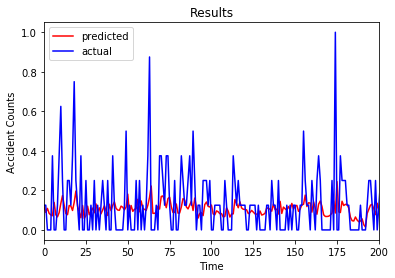

In [512]:
#plot yhat and testy
plt.plot(yhat,color='red', label='predicted')
plt.plot(test_y,color='blue',label='actual')
plt.title('Results')
plt.xlabel('Time')
plt.ylabel('Accident Counts')
plt.legend()
plt.xlim(0,200)

plt.show()

In [520]:
train_loss, train_acc = model.evaluate(test_X,test_y)

1026/1026 [==============================] - 2s 2ms/step


In [521]:
print('Training set accuracy:', train_acc)


Training set accuracy: 0.4395711500974659


# Attempt 2

In [468]:
#use temporarily because of issue with reshaping
data = full[['Temperature', 'Humidity',
                 'Wind Speed', 'Wind Gust', 'State Holiday']]
#input dim = 5

#train_y = train['counts']

#test_X = test[[
              #   'Temperature', 'Humidity',
               #  'Wind Speed', 'Wind Gust', 'State Holiday']]
#test_Y = test['counts']

In [469]:
full.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-01-01 02:00:00,Sunday,Night,1,43,37,81,NW,9,0,30.3,1.0
2017-01-01 04:00:00,Sunday,Night,1,41,36,81,NW,9,0,30.3,1.0
2017-01-01 06:00:00,Sunday,Morning,1,41,36,81,NW,12,0,30.3,1.0
2017-01-01 07:00:00,Sunday,Morning,2,41,36,81,NW,14,0,30.3,1.0
2017-01-01 10:00:00,Sunday,Morning,2,39,34,81,NW,13,0,30.3,1.0


In [475]:
#use full.csv
values = data.values
values = values.astype('float32')
values

array([[43., 81.,  9.,  0.,  1.],
       [41., 81.,  9.,  0.,  1.],
       [41., 81., 12.,  0.,  1.],
       ...,
       [61., 45., 20.,  0.,  0.],
       [61., 48., 12.,  0.,  0.],
       [61., 48., 12.,  0.,  0.]], dtype=float32)

In [476]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#MinMaxScaler
scaled_data = scaler.fit_transform(values)

In [477]:
scaled_data.shape

(5137, 5)

In [478]:
y_temp = full['counts'].values
y_temp.shape

(5137,)

In [479]:
y = np.array(y_temp)

In [480]:
#y = y_temp.reshape((-1, 1))

In [481]:
y.shape

(5137,)

In [482]:
def window_data(data, window_size):
    X = []
    
    i = 0
    while (i+ window_size) < len(data) :
        X.append(data[i:i+window_size])
        i+=1
    return X


In [483]:
X = window_data(scaled_data, 14)

In [484]:
len(X)

5123

In [485]:
#window size
import numpy as np
X_train = np.array(X[:4110])
y_train = np.array(y[:4110])

X_test = np.array(X[4110:])
y_test = np.array(y[4110:5123])


In [486]:
print("X_train size", X_train.shape)
print("y_train size", y_train.shape)

print("X_test size", X_test.shape)
print("y_test size", y_test.shape)


X_train size (4110, 14, 5)
y_train size (4110,)
X_test size (1013, 14, 5)
y_test size (1013,)


In [487]:
print(X_test.shape[0])

1013


In [415]:
# define variables
batch_size = 14
window_size = 14


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 50)                11200     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Train on 4110 samples, validate on 1013 samples
Epoch 1/100
 - 7s - loss: nan - val_loss: nan
Epoch 2/100
 - 1s - loss: nan - val_loss: nan
Epoch 3/100
 - 1s - loss: nan - val_loss: nan
Epoch 4/100
 - 1s - loss: nan - val_loss: nan
Epoch 5/100
 - 1s - loss: nan - val_loss: nan
Epoch 6/100
 - 1s - loss: nan - val_loss: nan
Epoch 7/100
 - 1s - loss: nan - val_loss: nan
Epoch 8/100
 - 1s - loss: nan - val_loss: nan
Epoch 9/100
 - 1s - loss: nan - val_loss: nan
Epoch 10/100
 - 1s - loss: nan - val_loss: nan
Epoch 11/100
 - 1s - loss

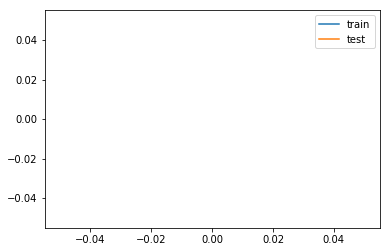

In [492]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_test.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# fit network
history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#accuracy


In [493]:
 
#print(test_X.shape)





ValueError: cannot reshape array of size 70910 into shape (1013,5)

# Attempt 3

In [269]:
data = full[['Temperature', 'Humidity',
                 'Wind Speed', 'Wind Gust', 'State Holiday']]
#counts

In [266]:
full.head()

,Weekday,Part of the day,counts,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,State Holiday
Datetime,,,,,,,,,,,
2017-01-01 02:00:00,Sunday,Night,1,43,37,81,NW,9,0,30.3,1.0
2017-01-01 04:00:00,Sunday,Night,1,41,36,81,NW,9,0,30.3,1.0
2017-01-01 06:00:00,Sunday,Morning,1,41,36,81,NW,12,0,30.3,1.0
2017-01-01 07:00:00,Sunday,Morning,2,41,36,81,NW,14,0,30.3,1.0
2017-01-01 10:00:00,Sunday,Morning,2,39,34,81,NW,13,0,30.3,1.0


In [272]:
input_features = data.values
input_data = input_features

In [273]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
input_data = sc.fit_transform(input_data)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [285]:
input_data.shape

(5137, 5)

In [ ]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i+ window_size) <= len(data) -1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        i+=1
    assert len(X) == len(y)
    return X, y

In [ ]:
scaled

In [275]:
lookback = 14
test_size = int(.2 * len(data))

X=[]
y=[]

for i in range(len(data)-lookback-1):
    t =[]
    for j in range(0,lookback):
        t.append(input_data[[(i+j)],:])
    X.append(t)
    y.append(input_data[i+lookback,1])

In [277]:
X,y = np.array(X) , np.array(y)
X_test =  X[:test_size+lookback]

feature_size = 5

X = X.reshape(X.shape[0],lookback,feature_size)
X_test = X_test.reshape(X_test.shape[0],lookback, feature_size)

In [278]:
print(X.shape)
print(X_test.shape)

(5122, 14, 5)
(1041, 14, 5)


In [279]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [280]:
model = Sequential()
model.add(LSTM(30,return_sequences=True, input_shape=(X.shape[1],feature_size)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(30))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 14, 30)            4320      
_________________________________________________________________
lstm_38 (LSTM)               (None, 14, 30)            7320      
_________________________________________________________________
lstm_39 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 31        
Total params: 18,991
Trainable params: 18,991
Non-trainable params: 0
_________________________________________________________________


In [281]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [283]:
model.fit(X,y,epochs=100,batch_size=2)


Epoch 1/100
 376/5122 [=>............................] - ETA: 1:33 - loss: nan

KeyboardInterrupt: 

5122/5122 [==============================] - 6s 1ms/step - loss: nan
Epoch 12/200
5122/5122 [==============================] - 6s 1ms/step - loss: nan
Epoch 13/200
3616/5122 [====================>.........] - ETA: 1s - loss: nan

# Single Feature

In [ ]:
#Version 3 - using 1 output
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# GRU

In [ ]:
inp = kl.Input((None,))
x = kl.Embedding(vocab_size, 64)(inp)
x = kl.GRU(128, return_sequences=True)(x)
x = kl.GlobalMaxPool1D()(x)
x = kl.Dense(64, activation='sigmoid')(x)
out = kl.Dense(n_classes, activation='sigmoid')(x)
    
model = keras.Model(inputs=inp, outputs=out)
model.summary()

# Evaluation

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics ='')


In [ ]:
model.fit(train_X, train_y, epochs=200, batch_size=32)
